In [32]:
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, BasicAer, IBMQ, execute, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.visualization import plot_bloch_multivector
import pandas as pd
#import matplotlib as mpl
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.random import random_circuit

IBMQ.save_account('0c5f09afe94bb9159f65f3ae983bdad4fd4fe1ef0fe97a1f9167ffc44c733c5ccb21d848987d3c1796fc3a40e2143fc5f902ddb2526a3df548c3b0ea53cba38f')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-10-05 14:29:48,688: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-10-05 14:29:49,870: Credentials are already in use. The existing account in the session will be replaced.


### Oracle1 - takes in solutions as a list in integer form and number of solutions

In [3]:
# def Oracle(n,sol,m):
    
#     qc = QuantumCircuit(n)
    
#     for ix in range(m):
#         if(sol[ix]<2**n):
          
#             for q in range(n):
#                 if (((sol[ix] >> q) & 1) == 0):
#                     qc.x(q)

#             ctr = []
#             for k in range(n-1):
#                 ctr.append(k)

#             qc.h(n-1)
#             qc.mct(ctr,n-1)
#             qc.h(n-1)

#             for qi in range(n):
#                 if (((sol[ix] >> qi) & 1) == 0):
#                     qc.x(qi)
                
#     Or = qc.to_gate()
#     Or.name = 'Oracle'
    
#     qc.barrier()
    
#     return Or

### Simple uniform superposition 

In [5]:
# def A(n):
    
#     qc = QuantumCircuit(n)
#     # input whatever the state you want as the input
    
#     for i in range(n):
#         qc.h(i)
    
#     return qc

### Oracle2 - Flips even states

In [83]:
def Oracle2(n): #Sol -> even no.s
    qc = QuantumCircuit(n)
    
    qc.z(0)
    qc.x(0)
    
    Or = qc.to_gate()
    return Or
    

### Custom Initial state preparation -> Creates superposition of 0,1,3,4,5,7 with non uniform amplitudes

In [89]:
def A(n):
    
    qc = QuantumCircuit(n)
    
    #qc = QuantumCircuit(3)
    qc.cu(1.5*np.pi, np.pi/10 ,np.pi,1.5*np.pi,0,1)
    qc.u(np.pi/2,6.18,6.08,2)
    qc.u(0.0497,3.23,5.07,1)
    qc.crz(5.55,2,0)
    qc.ry(3.79, 0)
    qc.rzz(4.71,1,2)
    
 
    return qc

In [85]:
def Ad(n):
    
    # no need to change this automaticlly becomes A_dag
    qc = A(n)
    
      
    qc_g = qc.to_gate(label = 'Adag')
    AAd = qc_g.inverse()
    AAd.name = '$A^{\\dag}$'
    
    return AAd

In [96]:
def S_0(n):
    
    qc = QuantumCircuit(n)
    
    
    ctr = []
    for k in range(1,n):
        ctr.append(k)


    qc.barrier()
    qc.x(list(range(n)))
    qc.h(0)
    qc.mct(ctr,0)
    qc.h(0)
    qc.x(list(range(n)))

    qc.barrier()

    return qc

The problems still standing are that - 

- when number of solutions is half or more than half of total number of possible states, then results are bungled up
- Works only for 1 or 4 repetitions of the Grover operator (Oracle+Diffuser)

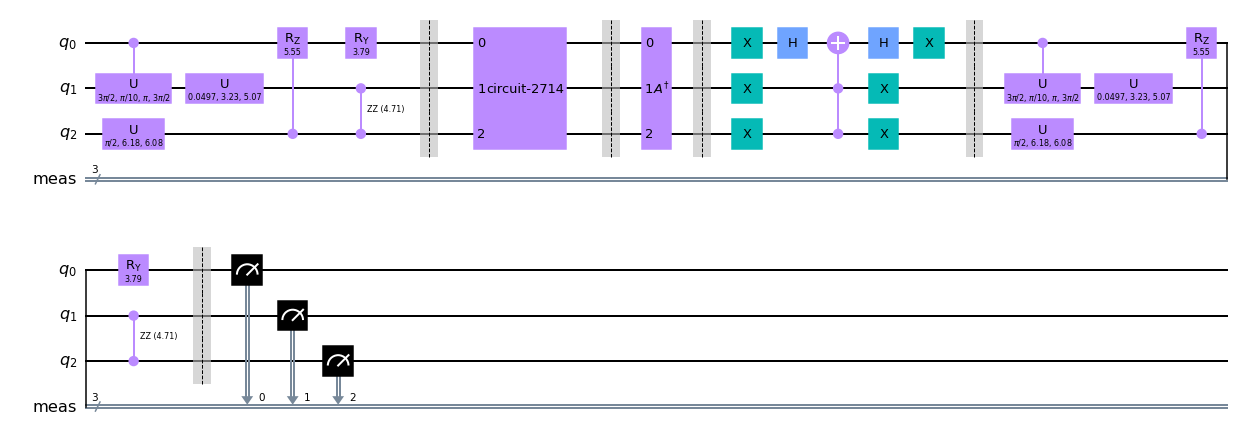

In [91]:
# sol = [0,2]
# m = 2

n = 3

qc1 = QuantumCircuit(n)


def num_iterations(m, n):
    amplitude = np.sqrt(m/(2**n))
    return round(np.arccos(amplitude) / (2 * np.arcsin(amplitude)))

#reps = num_iterations(m, n)

reps = 1 # works only with reps = 1,4 !!!

## here is the initial state
qc1  = qc1.compose(A(n))

for rep in range(reps):
    
    qc1.barrier()

    #qc1.append(Oracle(n, sol, m), list(range(n)))
    
    qc1.append(Oracle2(n),list(range(n)))

    qc1.barrier()
    
    #qc1.append(Ad(n),list(range(n)))
    
    qc1  = qc1.compose(Ad(n))
    qc1  = qc1.compose(S_0(n))
    qc1  = qc1.compose(A(n))

qc1.measure_all()

qc1.draw('mpl')

### The QAA amplifies all even number states present in initial state i.e. 0 and 4

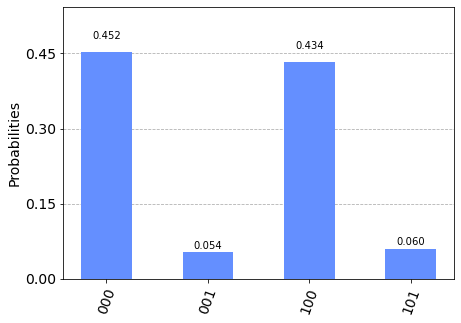

In [92]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc1,backend,shots = 1000)
counts = job.result().get_counts()
plot_histogram(counts)

### Another example with a random inital state

In [103]:
def A2(n):
    qc = random_circuit(n,n, measure=False)
    return qc

In [104]:
def A2i(n):
    
    qc = A2(n)
    qc_g = qc.to_gate(label = 'Adag')
    AAd2 = qc_g.inverse()
    AAd2.name = '$A_2^{\\dag}$'
    
    return AAd2
    

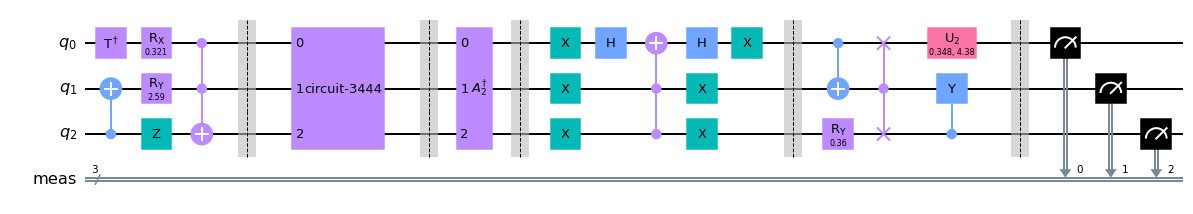

In [105]:
n = 3

qc2 = QuantumCircuit(n)


def num_iterations(m, n):
    amplitude = np.sqrt(m/(2**n))
    return round(np.arccos(amplitude) / (2 * np.arcsin(amplitude)))

#reps = num_iterations(m, n)

reps = 1 # works only with reps = 1,4 !!!

## here is the initial state
qc2  = qc2.compose(A2(n))

for rep in range(reps):
    
    qc2.barrier()
    
    qc2.append(Oracle2(n),list(range(n)))

    qc2.barrier()
    
    qc2  = qc2.compose(A2i(n))
    qc2  = qc2.compose(S_0(n))
    qc2  = qc2.compose(A2(n))

qc2.measure_all()

qc2.draw('mpl')

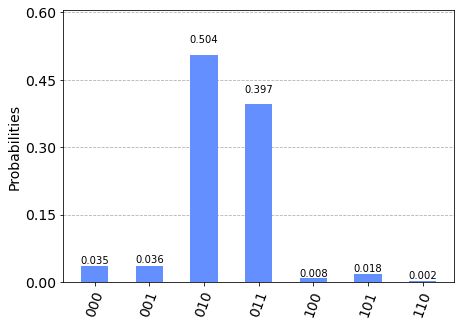

In [106]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc2,backend,shots = 1000)
counts = job.result().get_counts()
plot_histogram(counts)